/var/folders/xz/5bn1vdj146n6586g9r465k_40000gn/T/ipykernel_58676/4127469234.py:8: DtypeWarning: Columns (65) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/EPC_Catalonia.csv')
/var/folders/xz/5bn1vdj146n6586g9r465k_40000gn/T/ipykernel_58676/4127469234.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df.groupby("Qualificació de consum d'energia primaria no renovable", group_keys=False).apply(


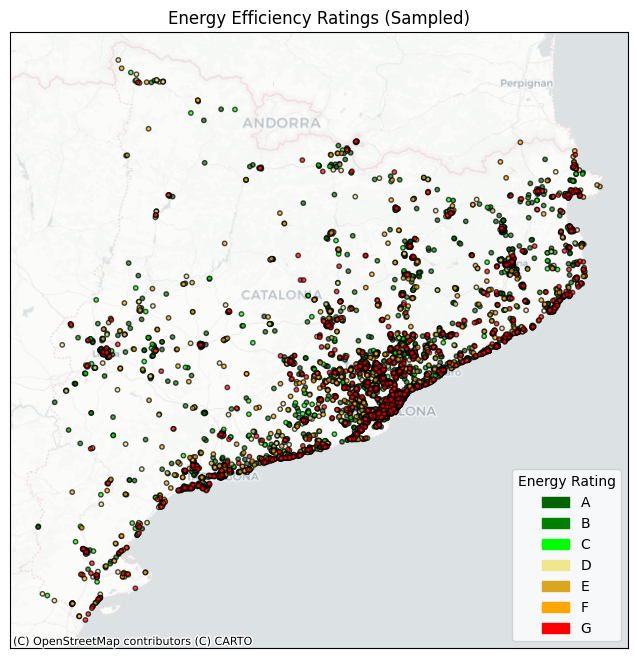

In [6]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
import numpy as np
import matplotlib.patches as mpatches

data = pd.read_csv('data/EPC_Catalonia.csv')
# Load relevant columns and drop NaNs
df = data[["Qualificació de consum d'energia primaria no renovable", "Qualificacio d'emissions de CO2",
           'LONGITUD', 'LATITUD']].dropna(subset=['LONGITUD', 'LATITUD'])

# -------- STRATIFIED SAMPLING TO REDUCE DATA SIZE --------
# Keep a balanced sample of ~1000 points per category
sample_size = 1000
df_sampled = df.groupby("Qualificació de consum d'energia primaria no renovable", group_keys=False).apply(
    lambda x: x.sample(min(len(x), sample_size))
)

# -------- COLOR MAPPING (A-G SCALE) --------
color_scale = {
    'A': 'darkgreen',  
    'B': 'green',  
    'C': 'lime',  
    'D': 'khaki',  
    'E': 'goldenrod',  
    'F': 'orange',  
    'G': 'red'
}

# Convert categorical ratings into colors
df_sampled['color'] = df_sampled["Qualificació de consum d'energia primaria no renovable"].map(color_scale)

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(df_sampled, geometry=gpd.points_from_xy(df_sampled.LONGITUD, df_sampled.LATITUD), crs="EPSG:4326")

# Reproject to Web Mercator (needed for contextily basemap)
gdf = gdf.to_crs(epsg=3857)

# -------- PLOT MAP --------
fig, ax = plt.subplots(figsize=(10, 8))

# Plot sampled points
gdf.plot(ax=ax, color=gdf['color'], markersize=10, alpha=0.7, edgecolor="black")

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, alpha=0.8)

# Formatting
ax.set_title("Energy Efficiency Ratings (Sampled)")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("")
ax.set_ylabel("")

legend_patches = [mpatches.Patch(color=color, label=label) for label, color in color_scale.items()]
ax.legend(handles=legend_patches, title="Energy Rating", loc="lower right")

plt.show()

/var/folders/xz/5bn1vdj146n6586g9r465k_40000gn/T/ipykernel_58676/1040370164.py:8: DtypeWarning: Columns (65) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/EPC_Catalonia.csv')
/var/folders/xz/5bn1vdj146n6586g9r465k_40000gn/T/ipykernel_58676/1040370164.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df.groupby("Qualificacio d'emissions de CO2", group_keys=False).apply(


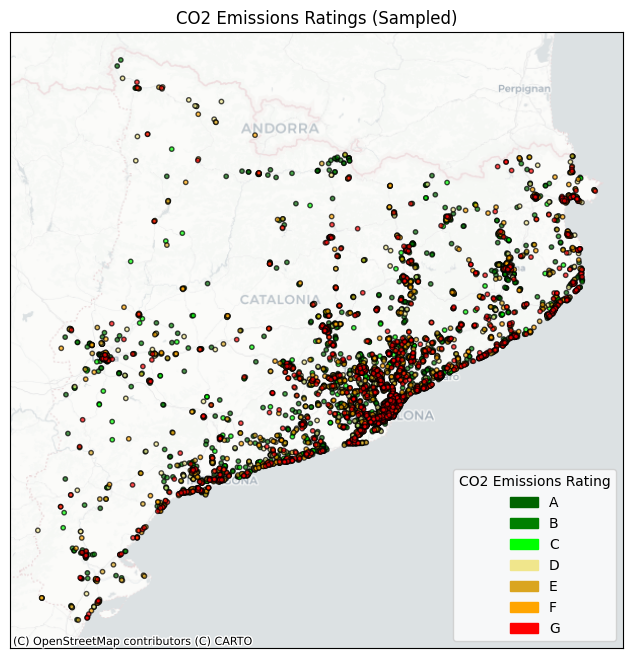

In [7]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
import numpy as np
import matplotlib.patches as mpatches

data = pd.read_csv('data/EPC_Catalonia.csv')
# Load relevant columns and drop NaNs
df = data[["Qualificació de consum d'energia primaria no renovable", "Qualificacio d'emissions de CO2",
           'LONGITUD', 'LATITUD']].dropna(subset=['LONGITUD', 'LATITUD'])

# -------- STRATIFIED SAMPLING TO REDUCE DATA SIZE --------

sample_size = 1000
df_sampled = df.groupby("Qualificacio d'emissions de CO2", group_keys=False).apply(
    lambda x: x.sample(min(len(x), sample_size))
)

# -------- COLOR MAPPING (A-G SCALE) --------
color_scale = {
    'A': 'darkgreen',  
    'B': 'green',  
    'C': 'lime',  
    'D': 'khaki',  
    'E': 'goldenrod',  
    'F': 'orange',  
    'G': 'red'
}

# Convert categorical ratings into colors
df_sampled['color'] = df_sampled["Qualificacio d'emissions de CO2"].map(color_scale)

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(df_sampled, geometry=gpd.points_from_xy(df_sampled.LONGITUD, df_sampled.LATITUD), crs="EPSG:4326")

# Reproject to Web Mercator (needed for contextily basemap)
gdf = gdf.to_crs(epsg=3857)

# -------- PLOT MAP --------
fig, ax = plt.subplots(figsize=(10, 8))

# Plot sampled points
gdf.plot(ax=ax, color=gdf['color'], markersize=10, alpha=0.7, edgecolor="black")

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, alpha=0.8)

# Formatting
ax.set_title("CO2 Emissions Ratings (Sampled)")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("")
ax.set_ylabel("")

legend_patches = [mpatches.Patch(color=color, label=label) for label, color in color_scale.items()]
ax.legend(handles=legend_patches, title="CO2 Emissions Rating", loc="lower right")

plt.show()

/var/folders/xz/5bn1vdj146n6586g9r465k_40000gn/T/ipykernel_58676/501999801.py:10: DtypeWarning: Columns (65) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/EPC_Catalonia.csv')
/var/folders/xz/5bn1vdj146n6586g9r465k_40000gn/T/ipykernel_58676/501999801.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap("RdYlGn_r")  # Red (high) to Green (low)


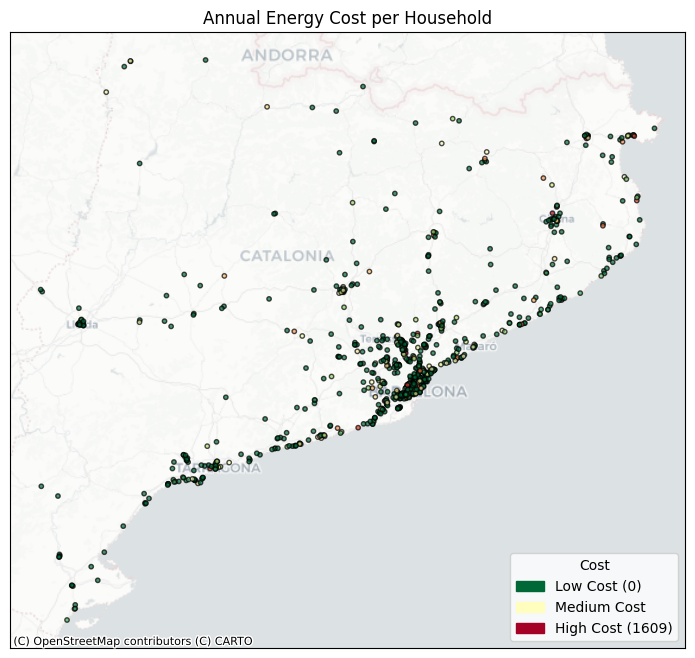

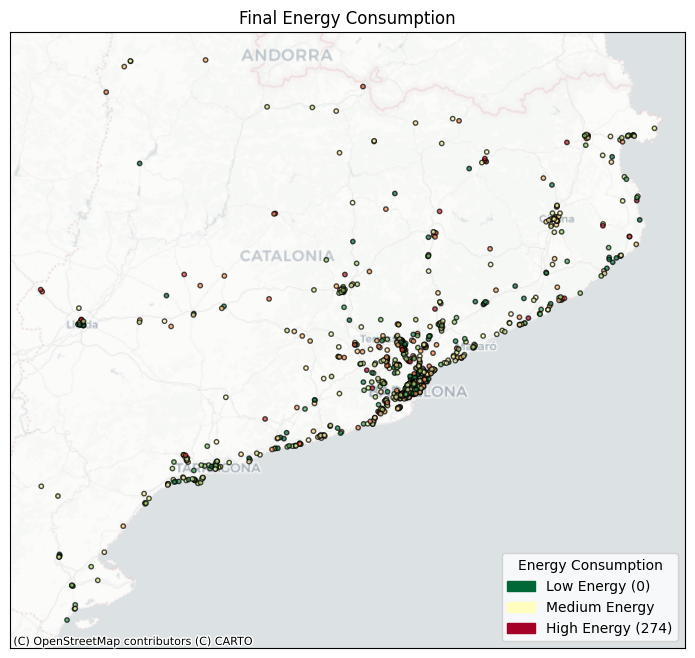

In [23]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Load data
data = pd.read_csv('data/EPC_Catalonia.csv')
df = data[["Consum d'energia final", "Cost anual aproximat d'energia per habitatge",
           'LONGITUD', 'LATITUD']].dropna(subset=['LONGITUD', 'LATITUD'])

# Sample data
sample_size = 1000
df_sampled = df.sample(n=min(len(df), sample_size), random_state=123)

q_low, q_high = df_sampled["Consum d'energia final"].quantile([0.05, 0.95])
df_sampled = df_sampled[(df_sampled["Consum d'energia final"] >= q_low) & (df_sampled["Consum d'energia final"] <= q_high)]

q_low, q_high = df_sampled["Cost anual aproximat d'energia per habitatge"].quantile([0.05, 0.95])
df_sampled = df_sampled[(df_sampled["Cost anual aproximat d'energia per habitatge"] >= q_low) & (df_sampled["Cost anual aproximat d'energia per habitatge"] <= q_high)]



# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(df_sampled, geometry=gpd.points_from_xy(df_sampled.LONGITUD, df_sampled.LATITUD), crs="EPSG:4326")
gdf = gdf.to_crs(epsg=3857)  # Reproject to Web Mercator for basemap

# Define colormap
colormap = cm.get_cmap("RdYlGn_r")  # Red (high) to Green (low)

# --- Plot 1: Cost Only ---
# Normalize cost values
cost_min = df_sampled["Cost anual aproximat d'energia per habitatge"].min()
cost_max = df_sampled["Cost anual aproximat d'energia per habitatge"].max()
gdf["normalized_cost"] = (df_sampled["Cost anual aproximat d'energia per habitatge"] - cost_min) / (cost_max - cost_min)
gdf["cost_color"] = gdf["normalized_cost"].apply(lambda x: mcolors.to_hex(colormap(x)))

fig1, ax1 = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax1, color=gdf["cost_color"], markersize=10, alpha=0.7, edgecolor="black")
ctx.add_basemap(ax1, source=ctx.providers.CartoDB.Positron, alpha=0.8)

ax1.set_title("Annual Energy Cost per Household")
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_xlabel("")
ax1.set_ylabel("")

# Cost legend
cost_legend = [
    mpatches.Patch(color="#006837", label=f"Low Cost ({cost_min:.0f})"),
    mpatches.Patch(color=mcolors.to_hex(colormap(0.5)), label="Medium Cost"),
    mpatches.Patch(color="#a50026", label=f"High Cost ({cost_max:.0f})")
]
ax1.legend(handles=cost_legend, title="Cost", loc="lower right")

# --- Plot 2: Energy Only ---
# Normalize energy values
energy_min = df_sampled["Consum d'energia final"].min()
energy_max = df_sampled["Consum d'energia final"].max()
gdf["normalized_energy"] = (df_sampled["Consum d'energia final"] - energy_min) / (energy_max - energy_min)
gdf["energy_color"] = gdf["normalized_energy"].apply(lambda x: mcolors.to_hex(colormap(x)))

fig2, ax2 = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax2, color=gdf["energy_color"], markersize=10, alpha=0.7, edgecolor="black")
ctx.add_basemap(ax2, source=ctx.providers.CartoDB.Positron, alpha=0.8)

ax2.set_title("Final Energy Consumption")
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_xlabel("")
ax2.set_ylabel("")

# Energy legend
energy_legend = [
    mpatches.Patch(color="#006837", label=f"Low Energy ({energy_min:.0f})"),
    mpatches.Patch(color=mcolors.to_hex(colormap(0.5)), label="Medium Energy"),
    mpatches.Patch(color="#a50026", label=f"High Energy ({energy_max:.0f})")
]
ax2.legend(handles=energy_legend, title="Energy Consumption", loc="lower right")

# Show both plots
plt.show()